In [1]:
import pandas as pd
import numpy as np

In [3]:
#Q1.i
data1=pd.read_table(r"D:\Data Mining\Sparsh_Sect1_Q1.ipynb")
data1

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5 non-null      int64  
 1   agegroup      5 non-null      object 
 2   height        5 non-null      float64
 3   status        5 non-null      object 
 4   yearsmarried  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [6]:
data1.shape

(5, 5)

In [7]:
data1.describe()

,Age,height,yearsmarried
count,5.000000,5.00000,5.000000
mean,59.200000,2.54000,4.800000
std,91.163041,5.45967,8.642916
min,2.000000,-7.00000,-1.000000
25%,18.000000,3.00000,0.000000
50%,21.000000,5.00000,2.000000
75%,34.000000,5.70000,3.000000
max,221.000000,6.00000,20.000000


In [8]:
data1.isnull().any()

Age             False
agegroup        False
height          False
status          False
yearsmarried    False
dtype: bool

In [9]:
data1.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [10]:
#Q1.ii

In [13]:
#1.
R1 = data1["Age"].apply(lambda x:True if x>0 and x<150 else False)
R1

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool

In [15]:
#2.
R2 = data1.apply(lambda x: True if x.Age>x.yearsmarried else False, axis=1)
R2

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [19]:
#3.
R3 = data1["status"].apply(lambda x: True if x=="married" or x=="single" or x=="widowed" else False)
R3

0    True
1    True
2    True
3    True
4    True
Name: status, dtype: bool

In [29]:
#4.
R4 = data1.apply(lambda x: True if (x.Age<18 and x.agegroup=="child") or (x.Age>=18 and x.Age<65 and x.agegroup=="adult") or (x.Age>=65 and x.agegroup=="elderly") else False, axis=1)
R4

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [30]:
#Q1.iii
RuleCheck = pd.DataFrame({"Rule1":R1,"Rule2":R2,"Rule3":R3,"Rule4":R4})
RuleCheck

,Rule1,Rule2,Rule3,Rule4
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,False,True,True,True
4,True,True,True,False


In [39]:
RuleCheck.astype(int).describe()

,Rule1,Rule2,Rule3,Rule4
count,5.000000,5.000000,5.0,5.000000
mean,0.800000,0.800000,1.0,0.800000
std,0.447214,0.447214,0.0,0.447214
min,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,1.0,1.000000
50%,1.000000,1.000000,1.0,1.000000
75%,1.000000,1.000000,1.0,1.000000
max,1.000000,1.000000,1.0,1.000000


In [32]:
print("number of times first rule violated : ",len(RuleCheck)-RuleCheck["Rule1"].sum())

number of times first rule violated :  1


In [33]:
print("number of second rule violated : ",len(RuleCheck)-RuleCheck["Rule2"].sum())

number of second rule violated :  1


In [34]:
print("number of third rule violated : ",len(RuleCheck)-RuleCheck["Rule3"].sum())

number of third rule violated :  0


In [35]:
print("number of fourth rule violated : ",len(RuleCheck)-RuleCheck["Rule4"].sum())

number of fourth rule violated :  1


In [36]:
RuleCheck.describe()

,Rule1,Rule2,Rule3,Rule4
count,5,5,5,5
unique,2,2,1,2
top,True,True,True,True
freq,4,4,5,4


In [37]:
import matplotlib.pyplot as plt

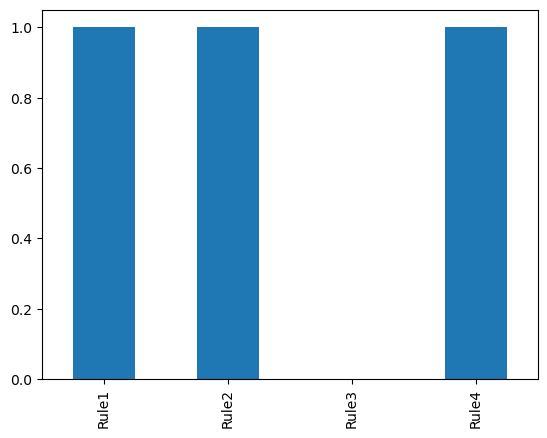

In [38]:
plt.figure()
RuleCheck.apply(lambda x:len(x)-x.sum()).plot(kind='bar')
plt.xlabel="Rules"
plt.ylabel="Number of records that violates the Rules"